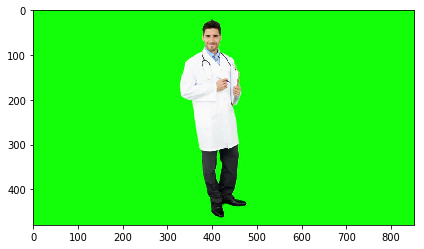

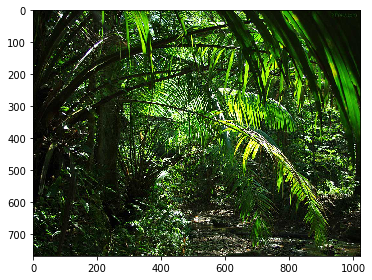

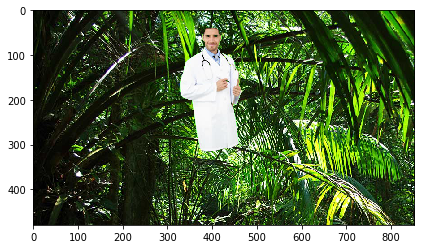

In [21]:
from skimage import io
import matplotlib.pyplot as plt
import math
import numpy as np

def distance(color1,color2):
    dif=0
    for i in range(0,3):
        dif=dif+math.pow((color1[i]-color2[i]),2)
        return math.sqrt(dif)
    
def chromakey(image,newBg,thresh,bgColor):
    rows,cols,dims=image.shape
    
    ret_img =np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            dif=distance(image[i,j],bgColor)
            if dif<thresh:
                for k in range(0,3):
                    ret_img[i,j,k]=newBg[i,j,k]
            else:
                for k in range(0,3):
                    ret_img[i,j,k]=image[i,j,k]
    return ret_img

img=io.imread('chromakey.jpg')
io.imshow(img)

img2=io.imread('jungle1.jpg')
plt.figure()
io.imshow(img2)

bgcolor=[0,255,0]
threshold=100

img3= chromakey(img,img2,threshold, bgcolor)
plt.figure()
io.imshow(img3)
io.show()